# AirBnB Assignment 

* In this particular assignment, the effect of AirBnB in Athens will be examined by presenting lists, tables and visualizations of the corresponding data collected by [Inside AirBnB](http://insideairbnb.com).
* We will thoroughly follow the procedure carried out for the generation of the appropriate results.

> Ioannis Kalantzis <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200235@aueb.gr

## Extracting the data 

* In this step of the assignment, we will go through the data and create the corresponding `DataFrames` objects using `Pandas`.

In [1]:
import pandas as pd

* We have downloaded and stored the data collected by [Inside AirBnB](http://insideairbnb.com) in the `data` folder.
* First, we have the `calendar` DataFrame containing the ids of every listing and for each date the corresponding availability, prices, minimum and maximum nights of stay.

In [2]:
calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip')
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,$18.00,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,$16.00,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,$16.00,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365


* Now, we will display the neighbourhoods of Athens as defined by [Inside AirBnB](http://insideairbnb.com)​.

In [3]:
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
neighbourhoods

,neighbourhood_group,neighbourhood
0,NaN,1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1,NaN,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4,NaN,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ
5,NaN,ΑΚΡΟΠΟΛΗ
6,NaN,ΑΜΠΕΛΟΚΗΠΟΙ
7,NaN,ΑΝΩ ΚΥΨΕΛΗ
8,NaN,ΑΝΩ ΠΑΤΗΣΙΑ
9,NaN,ΒΟΤΑΝΙΚΟΣ


* We observe that the 'neighbourhood_group' column of the `neighbourhoods` DataFrame contains only ***NaN*** values and thus we'll remove it.

In [4]:
neighbourhoods.drop('neighbourhood_group', axis=1, inplace=True)
neighbourhoods.head()

,neighbourhood
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ


* We'll now create the `listings` DataFrame and display information for each listing of Athens.

In [5]:
listings = pd.read_csv('data/listings.csv')
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1.059500e+04,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,144,1,42,9/10/2023,0.28,7,359,8,957568
1,1.099000e+04,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,70,1,66,7/1/2023,0.49,7,74,3,1070920
2,1.099300e+04,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,85,1,92,7/7/2023,0.69,7,52,5,957080
3,1.099500e+04,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989030,23.764480,Entire home/apt,60,1,30,6/2/2023,0.19,7,73,1,957422
4,2.726200e+04,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.989240,23.765000,Entire home/apt,85,1,21,6/2/2023,0.16,7,90,2,957579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,9.839370e+17,Condo in Athina · ★New · 2 bedrooms · 2 beds ·...,70297345,Stavros,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.992828,23.726859,Entire home/apt,46,1,0,NaN,NaN,10,267,0,2313840
12951,9.842800e+17,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,155,1,0,NaN,NaN,3,331,0,1191888
12952,9.842800e+17,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,162,1,0,NaN,NaN,3,345,0,2123997
12953,9.842800e+17,Rental unit in Athens · ★New · 2 bedrooms · 4 ...,107123386,Silvia - Interhome Group,NaN,ΝΙΡΒΑΝΑ,38.003435,23.725158,Entire home/apt,169,1,0,NaN,NaN,3,351,0,1191888


* As observed previously, the 'neighbourhood_group' column contains ***NaN*** values and thus we'll also remove it from the `listings` DataFrame.
* But, due to the large number of rows, we'll check that indeed all values are ***NaN***.

In [6]:
if listings['neighbourhood_group'].isna().all():
    listings.drop('neighbourhood_group', axis=1, inplace=True)
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595.0,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,9/10/2023,0.28,7,359,8,957568
1,10990.0,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,7/1/2023,0.49,7,74,3,1070920
2,10993.0,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,7/7/2023,0.69,7,52,5,957080
3,10995.0,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,60,1,30,6/2/2023,0.19,7,73,1,957422
4,27262.0,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,85,1,21,6/2/2023,0.16,7,90,2,957579


* Finally, we'll create the `reviews_detailed` DataFrame and display information for each review, familiarizing ourselves with its content. 

In [7]:
reviews_detailed = pd.read_csv('data/reviews_detailed.csv.gz', compression='gzip')
reviews_detailed

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
...,...,...,...,...,...,...
630573,975966554881091774,979517013920189393,2023-09-13,30142078,Ogan,"Nice location, good cleaning service. Room get..."
630574,976076532701121190,981716147162450311,2023-09-16,456119105,Walter,"Ci siamo trovati molto bene, lei è stata molto..."
630575,977373669051180593,981028500969444691,2023-09-15,506847475,Timothy,"Es ist eine super schöne Wohnung, perfekt gele..."
630576,977373669051180593,984569298719800410,2023-09-20,8366675,Rosie,Zavass et son épouse sont très aimables. <br/>...


* ***NOTE***: Before we begin working on the tasks of the assignment, we need to clarify that every time we need to use the DataFrames above, we will create a new one called `df` so that any changes do not affect our original data, unless we specifically intend to do that.

## Neighbourhood Listings in Descending Order

* In this specific task, we'll showcase the listings per neighbourghood, with the most popular neighbourhoods first, meaning in decreasing neighbourhood popularity order.
* Firstly, we'll approach the matter by counting the listings per neighbourhood. Evidently, the most popular will be the one with me most listings. 
* We'll group all the listings based on their neighbourhood and count their quantity. 

In [8]:
df = listings
listings_per_neighbourhood = df.groupby('neighbourhood')['id'].count().reset_index()
listings_per_neighbourhood

,neighbourhood,id
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,38
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,99
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,76
5,ΑΚΡΟΠΟΛΗ,386
6,ΑΜΠΕΛΟΚΗΠΟΙ,452
7,ΑΝΩ ΚΥΨΕΛΗ,119
8,ΑΝΩ ΠΑΤΗΣΙΑ,64
9,ΒΟΤΑΝΙΚΟΣ,80


* For visualization purposes, we'll rename the id column to number_of_listings, indicating the amount of listings per neighbourhood.
* Then, we are going to sort the `listings_per_neighbourhood` DataFrame in descending order based on their listings amount.

In [9]:
listings_per_neighbourhood = listings_per_neighbourhood.rename(columns={'id': 'number_of_listings'})
listings_per_neighbourhood = listings_per_neighbourhood.sort_values(by='number_of_listings',  ascending=False)
listings_per_neighbourhood

,neighbourhood,number_of_listings
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
28,ΝΕΟΣ ΚΟΣΜΟΣ,980
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
30,ΠΑΓΚΡΑΤΙ,511
6,ΑΜΠΕΛΟΚΗΠΟΙ,452
21,ΚΟΛΩΝΑΚΙ,425
5,ΑΚΡΟΠΟΛΗ,386


* Now, we'll approach the matter by counting the number of reviews per neighbourhood. Obviously, the most popular will be the one with me most amount of reviews. 
* We'll group all the listings per neighbourhood and sum the number of reviews for each neighbourhood. 

In [10]:
reviews_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
reviews_per_neighbourhood

,neighbourhood,number_of_reviews
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,2454
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,1380
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37690
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,2247
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,2923
5,ΑΚΡΟΠΟΛΗ,28135
6,ΑΜΠΕΛΟΚΗΠΟΙ,15508
7,ΑΝΩ ΚΥΨΕΛΗ,3102
8,ΑΝΩ ΠΑΤΗΣΙΑ,2367
9,ΒΟΤΑΝΙΚΟΣ,4679


* We'll sort the `reviews_per_neighbourhood` DataFrame based on the number of reviews.

In [11]:
reviews_per_neighbourhood = reviews_per_neighbourhood.sort_values(by='number_of_reviews', ascending=False)
reviews_per_neighbourhood

,neighbourhood,number_of_reviews
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,155818
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,75216
28,ΝΕΟΣ ΚΟΣΜΟΣ,47481
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37690
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37621
5,ΑΚΡΟΠΟΛΗ,28135
17,ΘΗΣΕΙΟ,28087
19,ΚΕΡΑΜΕΙΚΟΣ,19722
30,ΠΑΓΚΡΑΤΙ,19022
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,17754


* We can now observe that the two DataFrames have a lot of similarities. But how similar are they really?
* To calculate that, we'll use [Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).
* After reading helpful documentation for [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html), we'll import the corresponding `spearmanr` function from the `scipy.stats` module. 

In [12]:
from scipy.stats import spearmanr

* Let's merge the two DataFrames `reviews_per_neighbourhood` and `listings_per_neighbourhood` by neighbourhood and then calculate Spearman's rank correlation coefficient.

In [13]:
merged_df = pd.merge(reviews_per_neighbourhood, listings_per_neighbourhood, on='neighbourhood')
corr, _ = spearmanr(merged_df['number_of_reviews'], merged_df['number_of_listings'])
corr

0.9462259520292934

* The value 0.9462259520292934 indicates a significant correlation between the two derived lists of the 94th percentile.

##  Neighbourhood Prices in Descending Order

* Prices of an AirBnB can vary based on its host's personal wills and someone -for their own reasons- can overprice their listing. So, it would be better to avoid such prices by taking into consideration only the listings with a price less than 1000, avoiding outliers. 
* As for underpriced listings, as long as the minimum price is greater than zero, it is deliberate to consider it as 'valid'. Let's not forget that AirBnB is supposed to be an economic way of accommondation.

In [14]:
df = listings 
df = df[(df['price'] <= 1000) & (df['price'] > 0)]

* Now, we'll group the listings based on the neighbourhood and calculate the requested statistics using `agg()` function.

In [15]:
neighbourhood_stats = df.groupby('neighbourhood')['price'].agg(['median', 'mean', 'std', 'count']).reset_index()

* Then, for visualization purposes we' ll rename the columns.

In [16]:
neighbourhood_stats = neighbourhood_stats.rename(columns={
    'median': 'median_price',
    'mean': 'mean_price',
    'std': 'std_price',
    'count': 'number_of_listings'
})

* Finally, we'll sort the data in descending order based on the median price and display them. 

In [17]:
neighbourhood_stats = neighbourhood_stats.sort_values(by='median_price', ascending=False)
neighbourhood_stats

,neighbourhood,median_price,mean_price,std_price,number_of_listings
16,ΖΑΠΠΕΙΟ,114.0,164.234177,145.715855,158
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,129.873960,93.918419,2404
5,ΑΚΡΟΠΟΛΗ,100.0,130.732984,108.738444,382
21,ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
39,ΡΗΓΙΛΛΗΣ,96.0,109.750000,49.735132,4
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.0,117.538874,90.241190,1119
17,ΘΗΣΕΙΟ,90.0,122.537662,96.993875,385
19,ΚΕΡΑΜΕΙΚΟΣ,89.0,118.397661,91.095611,342
25,ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162
10,ΓΚΑΖΙ,70.5,95.792453,75.355882,106


* It would be interesting to calculate the correlation between the median price of a neighbourhood and its popularity. 
* We'll use the popularity based on the reviews. 
* Spearman's rank correlation coefficient will be used as done before.

In [18]:
merged_df = pd.merge(neighbourhood_stats, reviews_per_neighbourhood, on='neighbourhood')
corr, _ = spearmanr(merged_df['median_price'], merged_df['number_of_reviews'])
corr 

0.5881277105946998

* The correlation has a value of 58%, indicating that the popularity of a neigbourhood doen't always result in higher prices, something we would consider due to increased demand.

* It would also be interesting to calculate the correlation between the statistic measures of each neighbourhood.

In [19]:
corr_matrix = neighbourhood_stats[['median_price', 'mean_price', 'std_price', 'number_of_listings']].corr()
corr_matrix

,median_price,mean_price,std_price,number_of_listings
median_price,1.000000,0.973668,0.813517,0.464202
mean_price,0.973668,1.000000,0.901860,0.439193
std_price,0.813517,0.901860,1.000000,0.412158
number_of_listings,0.464202,0.439193,0.412158,1.000000


* From the matrix above, we have the following correlations of the values mentioned: 

    - mean price and median price: **97%**
    - standard deviation and median price: **81%**
    - number of listings and median price: **46%** 
    - number of listings and mean price: **43%**
    - number of listings and standard deviation: **41%** 
    - standard deviation and mean price: **90%** 

## Availability per Day

* For this part of the assignment, we have to create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.
* To do that, we're going to import `matplotlib.pyplot`.

In [20]:
import matplotlib.pyplot as plt 

* We'll use the data from the `calendar` DataFrame
* First, we're going to convert the date values into datetime type using Pandas' `to_datetime` function and calculate the availability per day, where 'available' has value t.

In [21]:
df = calendar
df['date'] = pd.to_datetime(df['date'])
available_listings = df[df['available'] == 't'].groupby('date').size()

* Then, we'll create the final plot using the `available_listings.index` and the `available_listings.values`, meaning the dates and the available listings per day correspondingly.

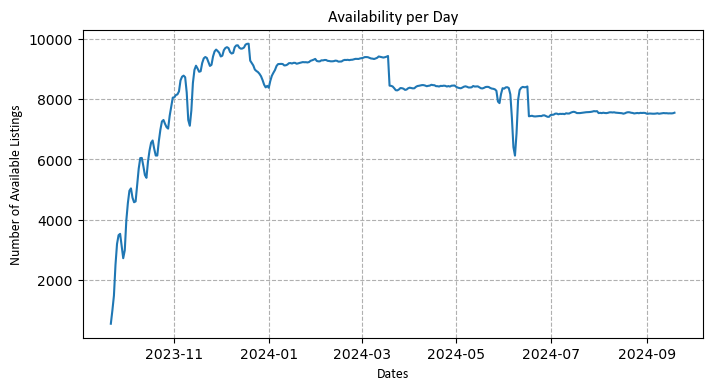

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(available_listings.index, available_listings.values, linestyle='-')
fd = {'fontname': 'Calibri'}
plt.title('Availability per Day', fd)
plt.xlabel('Dates', fd)
plt.ylabel('Number of Available Listings', fd)
plt.grid(True, linestyle='--')

* We observe a lot of fluctuations, a result of the reduced availability of listings on the weekends.
* The availability near the starting dates is reduced, which is reasonable due to the higher demand. People tend to dook their accommondation relatively near to the present date and not particularly for the distant future.
* Their is also a drop in availability during the Christmas holidays and New Year's Day.
* During the winter the amount of available listings is significantly increased and that number is reduced during the spring.
* It could be intriguing to examine the day in which we observe a huge drop in the availability after 2024-05.

In [23]:
filtered_data = available_listings['2024-05-01':]
lowest_availability_day = (filtered_data.idxmin()).strftime('%Y-%m-%d')
lowest_availability_day

'2024-06-08'

* It is the 8th of June and it doesn't coincide with any national holiday. But it is the first Saturday of the 2024 summer and the availability during that weekend seems to be decreasing.
* The availability during the rest of the summer, as we can notice from the plot is decreased at a constant level, a bit below 8000.

## Reviews, Occupacy per Listing, Average Income

* Let's create a histogram showing the number of reviews per listing. The histogram will bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.
* First, we have to find the listing with the most reviews.

In [24]:
df = listings
listing_with_most_reviews = df.loc[df['number_of_reviews'].idxmax()]
listing_with_most_reviews

id                                                                        1177492.0
name                              Earthen home in Athens · ★4.73 · 1 bedroom · 1...
host_id                                                                     6442400
host_name                                                                       Rio
neighbourhood                                                               ΖΑΠΠΕΙΟ
latitude                                                                  37.967319
longitude                                                                 23.735407
room_type                                                           Entire home/apt
price                                                                            38
minimum_nights                                                                    1
number_of_reviews                                                               865
last_review                                                               9/

* The number of the most reviews for a single listing is 865. 
* To round 865 up to the closest hundred, we have to divide it by 100 resulting in 8.65 and then use the `ceil()` function of `numpy` which rounds the decimal value up to the next highest integer, giving us 9.
* Finally, we multiply the rounded integer by 100 to obtain the rounded result, which is 900.

In [25]:
import numpy as np
max_reviews = np.ceil(df['number_of_reviews'].max() / 100) * 100

* Now, we'll create the histogram using the 'number of reviews' column and configure the bins so that they start at a value of 0 and go up to 1000 (max_reviews + 101).
* The bins will be adjusted every 100 units on the $x$ axis.

Text(0.5, 1.0, 'Number of Reviews per Listing')

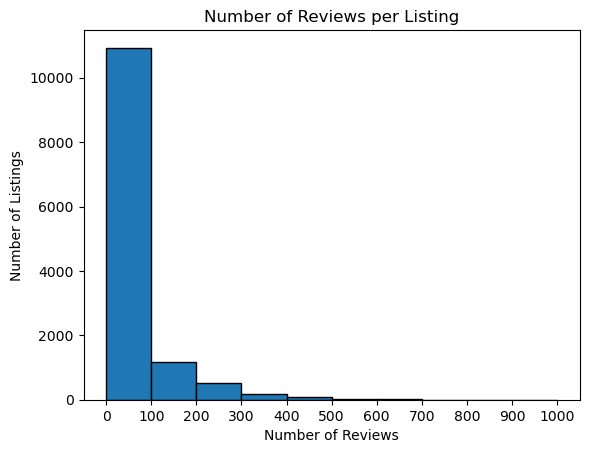

In [26]:
hist = plt.hist(df['number_of_reviews'], bins=np.arange(0, max_reviews + 101, 100), edgecolor='black')

plt.xticks(np.arange(0, max_reviews + 101, 100))

plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.title('Number of Reviews per Listing')

* As we already know, the listing with the highest number of reviews is 865, and it cannot be seen on the histogram. Additionally, after the 500 mark on the $x$ axis, the bins seem to disappear. 
* To visualize the bins at these numbers, we should focus on the values beyond 300 by changing the limits of the axis.

Text(0.5, 1.0, 'Number of Reviews per Listing')

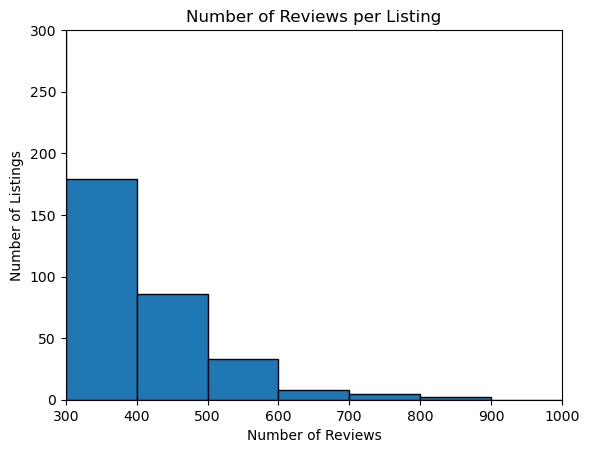

In [27]:
hist = plt.hist(df['number_of_reviews'], bins=np.arange(0, max_reviews + 101, 100), edgecolor='black')

plt.xticks(np.arange(0, max_reviews + 101, 100))

plt.xlim(300, 1000)
plt.ylim(0, 300)

plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.title('Number of Reviews per Listing')

* *Verification*: Because the number of listings from 0 to 100, reach values much greater than 10000, I want to verify that the sum of all the listings in the bins equals 12,955, which is also the total number of listings we have.

In [28]:
listings_per_bin = hist[0]
listings_per_bin = sum([float(format(x, '.4f')) for x in listings_per_bin])
listings_per_bin

12955.0

* Once we have done that, we'll calculate the average occupacy per listing per month. To calculate that, we're going to find the average reviews per month and assume that half of the bookings result in reviews.
* We'll use the data exactly 12 months before the date that appears on the Airbnb website, 2022-09-21.

In [29]:
df = reviews_detailed
last_year_reviews = df[(df['date'] >= '2022-09-21')] 

* Now we convert the 'date' column to datetime format using the specified format.
* At this point, the 'date' column in 'last_year_reviews' DataFrame is in datetime format, allowing for easier date-based operations and analysis to be followed.
* We need to copy the data so no warning will appear informing us that we are trying to modify a slice of a DataFrame, and it may not always behave as expected.

In [30]:
last_year_reviews = last_year_reviews.copy()
last_year_reviews['date'] = pd.to_datetime(last_year_reviews['date'], format='%Y-%m-%d')
last_year_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
34,10595,809238321997045296,2023-01-21,14324579,Katerina,The apartment was clean and warm (it’s importa...
35,10595,818634148446148025,2023-02-03,309898465,Γεωργιος,Καθαρό και μεγάλο σπίτι - θέρμανση και ζεστό ν...
36,10595,827398467488043694,2023-02-15,136171956,Sohiel,Highly recommended. Easy access . Good hosting...
37,10595,828760825421962230,2023-02-17,501305168,Guillaume,Nice place very quiet.<br/>Emmanouil is everyt...
38,10595,849045143329198236,2023-03-17,259418214,Chrisostomos,Εξαιρετικό και πεντακάθαρο διαμέρισμα. Πάρα πο...
...,...,...,...,...,...,...
630573,975966554881091774,979517013920189393,2023-09-13,30142078,Ogan,"Nice location, good cleaning service. Room get..."
630574,976076532701121190,981716147162450311,2023-09-16,456119105,Walter,"Ci siamo trovati molto bene, lei è stata molto..."
630575,977373669051180593,981028500969444691,2023-09-15,506847475,Timothy,"Es ist eine super schöne Wohnung, perfekt gele..."
630576,977373669051180593,984569298719800410,2023-09-20,8366675,Rosie,Zavass et son épouse sont très aimables. <br/>...


* We add 'year' and 'month' columns to the DataFrame based on the 'date' column.

In [31]:
last_year_reviews['year'] = last_year_reviews['date'].dt.year
last_year_reviews['month'] = last_year_reviews['date'].dt.month 

* After, we'll group the last year's reviews by 'listing_id', 'year', and 'month' and count the number of reviews. 

In [32]:
review_count = last_year_reviews.groupby(['listing_id', 'year', 'month']).size().reset_index(name='avg_review_count')
review_count

,listing_id,year,month,avg_review_count
0,10595,2023,1,1
1,10595,2023,2,3
2,10595,2023,3,1
3,10595,2023,5,1
4,10595,2023,6,1
...,...,...,...,...
58736,975413215364080586,2023,9,4
58737,975966554881091774,2023,9,1
58738,976076532701121190,2023,9,1
58739,977373669051180593,2023,9,2


* Then, we group the `review_count` DataFrame by 'listing_id' and count the number of months with reviews.

In [33]:
review_count = review_count.groupby('listing_id')['avg_review_count'].sum().reset_index()
review_count

,listing_id,avg_review_count
0,10595,8
1,10990,3
2,10993,5
3,10995,1
4,27262,2
...,...,...
9572,975413215364080586,4
9573,975966554881091774,1
9574,976076532701121190,1
9575,977373669051180593,2


* And finally, we calculate the average review count per month in the 'avg_review_count' column, named above.

In [34]:
review_count['avg_review_count'] = (review_count['avg_review_count'] / 12)
review_count

,listing_id,avg_review_count
0,10595,0.666667
1,10990,0.250000
2,10993,0.416667
3,10995,0.083333
4,27262,0.166667
...,...,...
9572,975413215364080586,0.333333
9573,975966554881091774,0.083333
9574,976076532701121190,0.083333
9575,977373669051180593,0.166667


* After that, to calculate the occupacy, as stated in the description of the assignment, we assume that half of the bookings result in reviews.

In [35]:
review_count['avg_review_count'] = review_count['avg_review_count'] * 2
review_count.rename(columns={'avg_review_count': 'occupacy'}, inplace=True)
listing_occupacy = review_count
listing_occupacy

,listing_id,occupacy
0,10595,1.333333
1,10990,0.500000
2,10993,0.833333
3,10995,0.166667
4,27262,0.333333
...,...,...
9572,975413215364080586,0.666667
9573,975966554881091774,0.166667
9574,976076532701121190,0.166667
9575,977373669051180593,0.333333


* As we can see, the rows of `listing_occupacy` DataFrame are less than the listings. That's because some of the have zero comments.
* However, we'll include them in our final Dataframe by merging `listing_occupacy` and `listings`.

In [36]:
df = listings[['id']].copy()
listing_occupacy = df.merge(listing_occupacy, left_on='id', right_on='listing_id', how='left')
listing_occupacy['occupacy'].fillna(0, inplace=True)
listing_occupacy.drop(columns=['listing_id'], inplace=True)
listing_occupacy

,id,occupacy
0,1.059500e+04,1.333333
1,1.099000e+04,0.500000
2,1.099300e+04,0.833333
3,1.099500e+04,0.166667
4,2.726200e+04,0.333333
...,...,...
12950,9.839370e+17,0.000000
12951,9.842800e+17,0.000000
12952,9.842800e+17,0.000000
12953,9.842800e+17,0.000000


* For the last task, we'll calculate the average price of all listings and then, assuming that each booking is for a three nights stay, will find the average income *per listing*.

In [37]:
df = listings
avg_price = listings['price'].mean()
avg_income = listing_occupacy
avg_income['avg_income'] = avg_income['occupacy'] * 3 * avg_price
avg_income.drop(columns=['occupacy'], inplace=True)
avg_income

,id,avg_income
0,1.059500e+04,441.834350
1,1.099000e+04,165.687881
2,1.099300e+04,276.146469
3,1.099500e+04,55.229294
4,2.726200e+04,110.458587
...,...,...
12950,9.839370e+17,0.000000
12951,9.842800e+17,0.000000
12952,9.842800e+17,0.000000
12953,9.842800e+17,0.000000


## Listings per Room Type

* We'll show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type).
* First, we calculate the number of listings per room type with `value_counts()`.

In [38]:
df = listings
room_type_counts = df['room_type'].value_counts()
room_type_counts 

room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

* Then, the corresponding persentages.

In [39]:
room_type_percentages = (room_type_counts / room_type_counts.sum()) * 100
room_type_percentages

room_type
Entire home/apt    89.942107
Private room        8.591277
Hotel room          0.810498
Shared room         0.656117
Name: count, dtype: float64

* To show the number of listings per neighbourhood and room type, we have to group by the listings based on the neighbourhood and room type and then convert float values into int for better visualization.

In [40]:
df = listings
neighborhood_room_type_counts = df.groupby(['neighbourhood', 'room_type']).size().unstack().fillna(0)
neighborhood_room_type_counts = neighborhood_room_type_counts.astype(int)
neighborhood_room_type_counts

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,55,0,0,0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,33,0,5,0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,686,4,117,10
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,91,0,8,0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,74,0,2,0
ΑΚΡΟΠΟΛΗ,360,6,20,0
ΑΜΠΕΛΟΚΗΠΟΙ,431,0,17,4
ΑΝΩ ΚΥΨΕΛΗ,103,0,16,0
ΑΝΩ ΠΑΤΗΣΙΑ,61,0,3,0


## Prices per Day

* Now, we'll create a table with the average price per listing per day. We won't exclude any price values and we'll include outliers, so to not change the length of our columns. 
* We'll calculate the average ajusted price of each listing for every day of the year.

In [41]:
df = calendar
df['adjusted_price'] = df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)
avg_adjusted_price = df.groupby('date')['adjusted_price'].mean().reset_index(name='avg_price')
avg_adjusted_price

,date,avg_price
0,2023-09-21,109.877181
1,2023-09-22,112.868458
2,2023-09-23,113.254670
3,2023-09-24,110.520380
4,2023-09-25,109.968813
...,...,...
360,2024-09-15,109.344655
361,2024-09-16,108.825936
362,2024-09-17,108.806561
363,2024-09-18,108.714087


* We'll then create the visualization of the table above using a plot. 

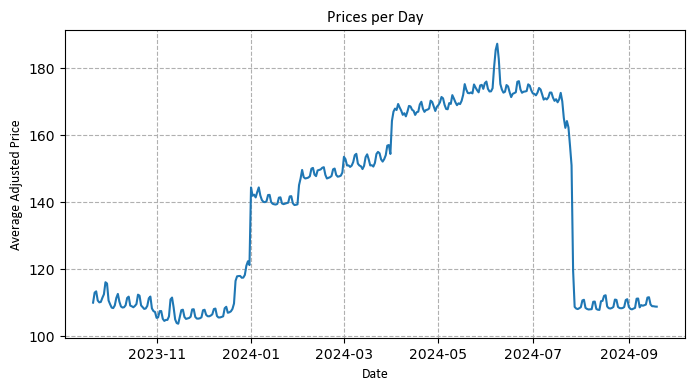

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(avg_adjusted_price['date'], avg_adjusted_price['avg_price'], linestyle='-')
fd = {'fontname': 'Calibri'}
plt.xlabel('Date', fd)
plt.ylabel('Average Adjusted Price', fd)
plt.title('Prices per Day', fd)
plt.grid(True, linestyle='--')

* As we can see from the visualization of the prices per day, the prices increase as we come closer to the summer season. At that time of the year, the demand increases and the prices will follow the same pattern. It also confirms the availability plot we visualized previously and their inversely proportional relation. 
* For example during the winter, with increased availability, the prices decrease.

In [43]:
highest_price_date = (avg_adjusted_price.sort_values(by='avg_price', ascending=False)).iloc[0]
highest_price_date

date         2024-06-08 00:00:00
avg_price             187.232129
Name: 261, dtype: object

* It is very interesting to notice that the day with the highest prices, is the one with the least availability, 2024-06-08.

## Listings per Host

* We will now rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. For hosts with the same listings, we are just going to add them in a sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.
* We are going to use the data from `listings` DataFrame.
* Once again, using the `value_count()` function we'll count the amount of listings per host.
* For the ranking, we are just going to follow the index pattern adding one, so the host with the most listings is in 1st place and not in 'zero' place(indexs start from zero). 
* For those with the same amount, we are going to randomly place them in any order between them, as mentiond in the assignment. So, if 2 people have 4 listings, one will get the $n$ place and the other $(n + 1)$ place in the ranking.

In [44]:
df = listings
host_listings = df['host_id'].value_counts().reset_index()
host_listings['ranking'] = host_listings.index + 1
host_listings

,host_id,count,ranking
0,20104194,114,1
1,113548208,88,2
2,90390850,78,3
3,748818,74,4
4,47267002,61,5
...,...,...,...
5769,271377857,1,5770
5770,241385044,1,5771
5771,42496318,1,5772
5772,131678220,1,5773


* Now, let's create the plot.

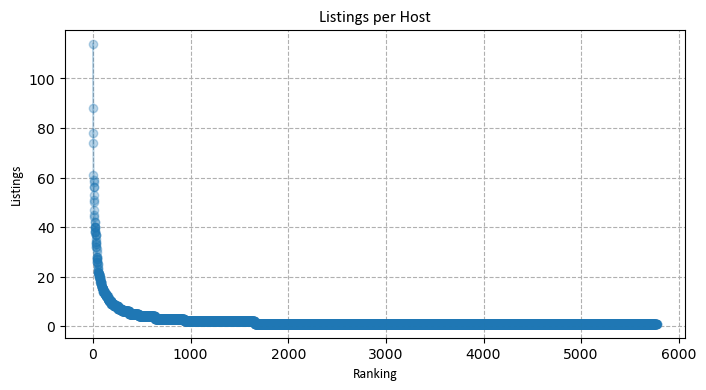

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(host_listings['ranking'], host_listings['count'], linestyle='-', marker='o', alpha=0.3)
fd = {'fontname': 'Calibri'}
plt.title('Listings per Host', fd)
plt.xlabel('Ranking', fd)
plt.ylabel('Listings', fd)
plt.grid(True, linestyle='--')

* By adding just this line of code: `plt.xscale('log')`, we turn $x$ axis in *logarithmic* scale.

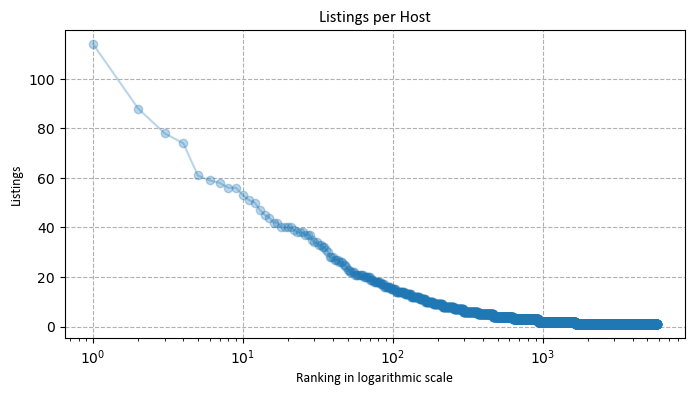

In [46]:
plt.figure(figsize=(8, 4))
plt.plot(host_listings['ranking'], host_listings['count'], linestyle='-', marker='o', alpha=0.3)
fd = {'fontname': 'Calibri'}
plt.title('Listings per Host', fd)
plt.xlabel('Ranking in logarithmic scale', fd)
plt.ylabel('Listings', fd)
plt.xscale('log')
plt.grid(True, linestyle='--')

* The information we can extract from the visualization of both plot is that just a few people have 40 listings and more. 
* Most of the hosts have 1 or 2 listings as it appears in the straight line formed in the first plot and the most curvy one in the second. The curve appears due to the logarithmic scale. 

## Visualize Listings

* To draw an interactive map to show the listings ovelayed on Athens, we first have to import folium.

In [47]:
import folium

* After that, we set the location on the map for Athens with the corresponding coordinates and suggested max zoom 15.

In [48]:
m = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15)

* Now, we'll import `folium.Html` class to render HTML content within the popup.

In [49]:
from folium import Html

* For each listing, we'll have a description based on the listing's name and price.
* Then we'll create an html content variable to set as input to the `Html()` function.
* This content will be the one poping up when you click the mark.
* Finally, we save the changes and save the map to `AthensMap.html` file.

In [50]:
for index, row in listings.iterrows():
    description = row['name']
    price = row['price']

    
    html_content = f"<b>Description:</b> {description}<br><b>Price:</b> {price}"
    popup_content = Html(html_content, script=True)

    folium.Marker(
        location = [row['latitude'], row['longitude']],
        popup = popup_content
    ).add_to(m)

m.save("AthensMap.html")